<a href="https://colab.research.google.com/github/iMan0405/Data_Science_Cert/blob/main/Aviachipta_narxini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviachipta narxini bashorat qilish
### Aviakompaniyalar uchun aviachiptalarning kelajakdagi narxlari qanday bo'lishini aniqlash

### Kerakli kutubxonalarni yuklab olamiz

In [127]:
import pandas as pd
import numpy as np
import sklearn
from fastai.vision.all import *
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import tensorflow as tf
import pickle

### Kaggle tomonidan berilgan data fayllarni yuklab ma'lumotini ko'ramiz

In [128]:
sample_solution = pd.read_csv('/content/sample_solution.csv')
sample_solution = sample_solution.drop('id', axis=1)
test_data = pd.read_csv('/content/test_data.csv')
test_data = test_data.drop('id', axis=1)
train_data = pd.read_csv('/content/train_data.csv')
train_data = train_data.drop('id', axis=1)

In [129]:
sample_solution.head()

,price
0,0
1,0
2,0
3,0
4,0


In [130]:
sample_solution.shape

(5000, 1)

In [131]:
test_data = test_data.drop('flight', axis=1)
test_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


### Test data jadvali bo'yicha ma'lumotlarni ko'ramiz

In [132]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   source_city       5000 non-null   object 
 2   departure_time    5000 non-null   object 
 3   stops             5000 non-null   object 
 4   arrival_time      5000 non-null   object 
 5   destination_city  5000 non-null   object 
 6   class             5000 non-null   object 
 7   duration          5000 non-null   float64
 8   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


In [133]:
test_data.shape

(5000, 9)

In [134]:
train_data = train_data.drop('flight', axis=1)
train_data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


### Train data jadvali bo'yicha ma'lumotlarni ko'ramiz

In [135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   source_city       20000 non-null  object 
 2   departure_time    20000 non-null  object 
 3   stops             20000 non-null  object 
 4   arrival_time      20000 non-null  object 
 5   destination_city  20000 non-null  object 
 6   class             20000 non-null  object 
 7   duration          20000 non-null  float64
 8   days_left         20000 non-null  int64  
 9   price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.5+ MB


In [136]:
train_data.shape

(20000, 10)

### train data correlatsiyasini ko'ramiz

In [137]:
train_data.corrwith(train_data['price'])

<ipython-input-137-c5e969a065f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corrwith(train_data['price'])


duration     0.213158
days_left   -0.102545
price        1.000000
dtype: float64

In [138]:
col = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

X_train = train_data.drop('price', axis=1)
y = train_data['price'].copy()

X_num = X_train.drop(col, axis=1)

### X_Train, y va X_num larni ko'ramiz

In [139]:
X_train.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4


In [140]:
y.head()

0     7212
1     5292
2    60553
3     5760
4    10712
Name: price, dtype: int64

In [141]:
X_num.head()

,duration,days_left
0,14.25,21
1,1.75,7
2,9.58,5
3,6.75,28
4,2.00,4


### Pipeline quramiz

### Sonli ustun uchun konveyr yaratamiz

In [142]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

### Pipeline ni ishga tushuramiz

In [143]:
num_pipeline.fit_transform(X_num)

array([[ 0.28952803, -0.36141789],
       [-1.45682723, -1.38897606],
       [-0.36291029, -1.53577008],
       ...,
       [ 3.23458153, -0.65500594],
       [ 0.58012154, -0.36141789],
       [ 0.84836171,  0.00556716]])

### Matnli ustunlarga ishlov berish

In [144]:
num_attribs = list(X_num)
cat_attribs = col

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

### Konveyrni ishga tushiramiz

In [145]:
X_prepared = full_pipeline.fit_transform(X_train)

In [146]:
X_prepared[:, :]

<20000x37 sparse matrix of type '<class 'numpy.float64'>'
	with 180000 stored elements in Compressed Sparse Row format>

# Machine Learning

In [147]:
LR_Model = LinearRegression()

In [148]:
LR_Model.fit(X_prepared, y)

LinearRegression()

In [149]:
test = X_train.sample(10)
test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
9556,Air_India,Mumbai,Night,one,Late_Night,Delhi,Economy,6.67,21
19258,GO_FIRST,Delhi,Early_Morning,one,Night,Chennai,Economy,14.33,29
4357,GO_FIRST,Mumbai,Morning,one,Afternoon,Delhi,Economy,6.00,38
700,Vistara,Bangalore,Early_Morning,one,Afternoon,Mumbai,Economy,7.00,32
9722,Vistara,Kolkata,Early_Morning,one,Night,Bangalore,Business,15.50,14
12229,Indigo,Kolkata,Early_Morning,two_or_more,Evening,Chennai,Economy,10.17,40
16655,Air_India,Delhi,Night,one,Night,Bangalore,Economy,24.58,8
11690,Indigo,Kolkata,Early_Morning,one,Afternoon,Hyderabad,Economy,7.58,11
10277,Vistara,Kolkata,Early_Morning,one,Evening,Bangalore,Business,11.67,32
632,GO_FIRST,Mumbai,Afternoon,one,Night,Delhi,Economy,5.00,33


In [150]:
test_label = y.loc[test.index]
test_label

9556      5828
19258     4896
4357      7175
700       6568
9722     60978
12229     3067
16655    11520
11690    12159
10277    60978
632       7808
Name: price, dtype: int64

In [151]:
test_prepared = full_pipeline.transform(test)
test_prepared

<10x37 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [152]:
predicted_data = LR_Model.predict(test_prepared)
predicted_data

array([ 4846.16240894,  6983.58516544,  4087.32998035,  8656.29360524,
       59334.33823474, 10294.65971039,  8356.88840127,  9686.94006171,
       56457.7087706 ,  4998.49638732])

In [153]:
pd.DataFrame({'Taxminiy baxosi':predicted_data, 'Haqiqiy baxosi': test_label})

,Taxminiy baxosi,Haqiqiy baxosi
9556,4846.162409,5828
19258,6983.585165,4896
4357,4087.329980,7175
700,8656.293605,6568
9722,59334.338235,60978
12229,10294.659710,3067
16655,8356.888401,11520
11690,9686.940062,12159
10277,56457.708771,60978
632,4998.496387,7808


### Xatolikni tekshiramiz

In [154]:
mse = mean_squared_error(test_label, predicted_data)
rmse = np.sqrt(mse)
print(rmse)

3443.836244230359


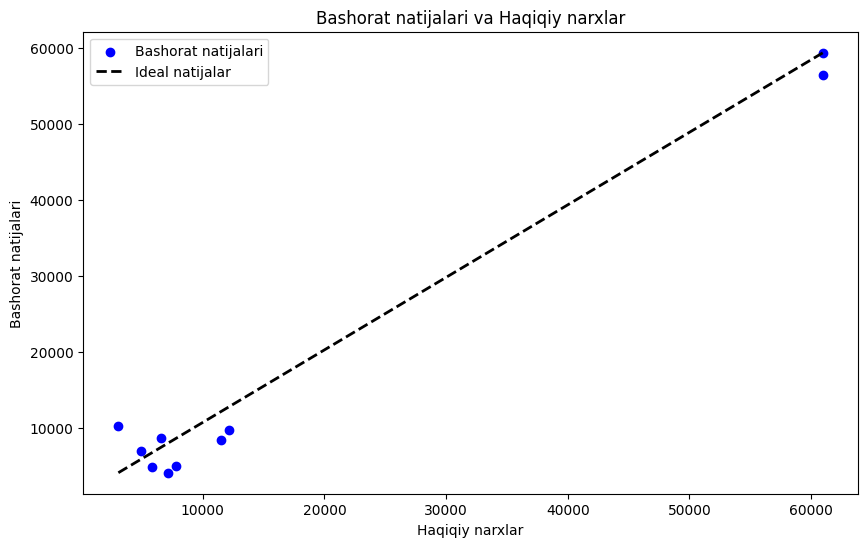

In [155]:
# Bashorat natijalarni grafikda chizish
plt.figure(figsize=(10, 6))
plt.scatter(test_label, predicted_data, color='blue', label='Bashorat natijalari')
plt.plot([min(test_label), max(test_label)], [min(predicted_data), max(predicted_data)], 'k--', lw=2, label='Ideal natijalar')
plt.xlabel('Haqiqiy narxlar')
plt.ylabel('Bashorat natijalari')
plt.title('Bashorat natijalari va Haqiqiy narxlar')
plt.legend()
plt.show()

# Modelni baholash

### test data da sinov

In [156]:
test_data

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...
4995,Air_India,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,Indigo,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,Air_India,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,Air_India,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


### testni pipeline dan o'tkazish

In [157]:
test_data_prepared = full_pipeline.transform(test_data)

In [158]:
y_predicted = LR_Model.predict(test_data_prepared)
y_predicted

array([55954.37763147, 53515.85361649, 40638.68279412, ...,
       51475.43234705, 48599.737154  , 51809.17049893])

In [159]:
pd.DataFrame({'Test data jadvalidagi chiptalar narxini taxminiy baxosi':y_predicted})

,Test data jadvalidagi chiptalar narxini taxminiy baxosi
0,55954.377631
1,53515.853616
2,40638.682794
3,2403.004663
4,5894.522567
...,...
4995,53356.323245
4996,-884.865969
4997,51475.432347
4998,48599.737154


# DecisionTree modeli

In [160]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [161]:
test = X_train.sample(10)
test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
13080,Vistara,Kolkata,Evening,one,Afternoon,Delhi,Economy,19.08,1
18158,Air_India,Kolkata,Afternoon,one,Night,Delhi,Economy,7.92,24
4360,Air_India,Hyderabad,Night,one,Morning,Chennai,Business,12.08,37
7355,Air_India,Hyderabad,Morning,one,Evening,Delhi,Economy,6.75,46
18750,Vistara,Mumbai,Night,one,Morning,Bangalore,Business,11.75,16
16828,AirAsia,Kolkata,Morning,two_or_more,Night,Mumbai,Economy,13.17,23
19932,Vistara,Delhi,Morning,one,Evening,Kolkata,Business,10.42,21
16962,AirAsia,Bangalore,Early_Morning,one,Afternoon,Delhi,Economy,7.58,13
11800,Vistara,Chennai,Morning,one,Evening,Bangalore,Economy,32.50,17
18451,Vistara,Kolkata,Afternoon,one,Afternoon,Hyderabad,Economy,21.25,45


In [162]:
test_label = y.loc[test.index]
test_label

13080    16989
18158     4960
4360     51595
7355      6117
18750    93579
16828     4267
19932    59929
16962     7484
11800    14597
18451    10301
Name: price, dtype: int64

In [163]:
test_prepared = full_pipeline.transform(test)
test_prepared

<10x37 sparse matrix of type '<class 'numpy.float64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [164]:
predicted_data = Tree_model.predict(test_prepared)
predicted_data

array([16989.,  4960., 51595.,  6117., 93579.,  4267., 59929.,  7484.,
       14597., 10301.])

In [165]:
pd.DataFrame({'Taxminiy baxosi':predicted_data, 'Haqiqiy baxosi': test_label})

,Taxminiy baxosi,Haqiqiy baxosi
13080,16989.0,16989
18158,4960.0,4960
4360,51595.0,51595
7355,6117.0,6117
18750,93579.0,93579
16828,4267.0,4267
19932,59929.0,59929
16962,7484.0,7484
11800,14597.0,14597
18451,10301.0,10301


In [166]:
mse = mean_squared_error(test_label, predicted_data)
rmse = np.sqrt(mse)
print(rmse)

0.0


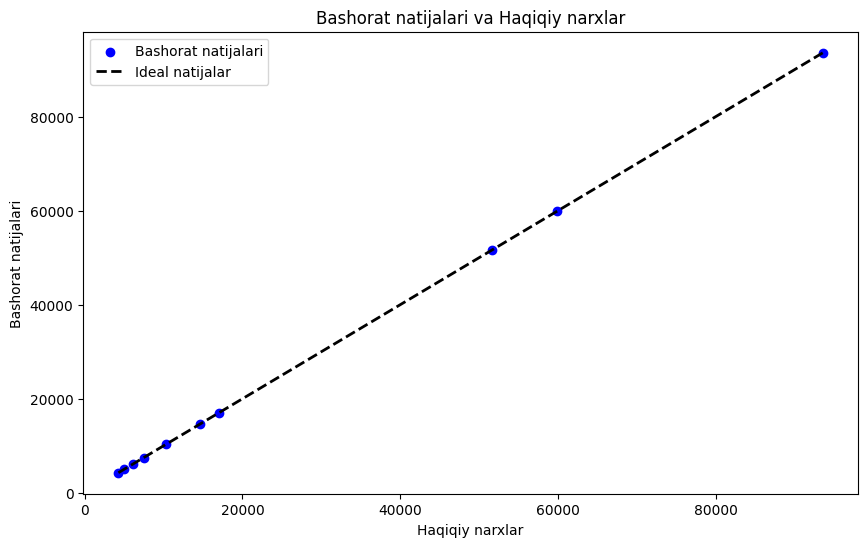

In [167]:
# Bashorat natijalarni grafikda chizish
plt.figure(figsize=(10, 6))
plt.scatter(test_label, predicted_data, color='blue', label='Bashorat natijalari')
plt.plot([min(test_label), max(test_label)], [min(predicted_data), max(predicted_data)], 'k--', lw=2, label='Ideal natijalar')
plt.xlabel('Haqiqiy narxlar')
plt.ylabel('Bashorat natijalari')
plt.title('Bashorat natijalari va Haqiqiy narxlar')
plt.legend()
plt.show()

# Modelni baholash

### test data da sinov

In [168]:
test_data_prepared = full_pipeline.transform(test_data)
y_predicted = Tree_model.predict(test_data_prepared)
pd.DataFrame({'Test data jadvalidagi chiptalar narxini taxminiy baxosi':y_predicted})

,Test data jadvalidagi chiptalar narxini taxminiy baxosi
0,54863.0
1,51384.0
2,23484.0
3,2228.0
4,5102.0
...,...
4995,60978.0
4996,3862.0
4997,50271.0
4998,50868.0


### sample_solution ga test data bo'yicha predict chipta bahosini saqlaymiz

In [169]:
sample_solution['price'] = y_predicted
sample_solution

,price
0,54863.0
1,51384.0
2,23484.0
3,2228.0
4,5102.0
...,...
4995,60978.0
4996,3862.0
4997,50271.0
4998,50868.0


# RandomForest modeli

In [170]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [171]:
test = X_train.sample(10)
test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
18852,Vistara,Bangalore,Morning,one,Night,Mumbai,Economy,11.50,27
143,Air_India,Chennai,Early_Morning,one,Night,Delhi,Business,14.92,24
14736,Indigo,Delhi,Evening,one,Night,Kolkata,Economy,6.33,48
11797,Indigo,Mumbai,Afternoon,one,Evening,Bangalore,Economy,5.75,36
16607,Air_India,Delhi,Morning,zero,Afternoon,Bangalore,Economy,2.75,32
6282,AirAsia,Bangalore,Early_Morning,one,Night,Mumbai,Economy,16.08,16
2716,Air_India,Mumbai,Early_Morning,one,Evening,Delhi,Economy,14.50,16
9157,Vistara,Chennai,Night,one,Evening,Delhi,Economy,21.58,31
11657,SpiceJet,Kolkata,Evening,one,Afternoon,Mumbai,Economy,19.25,32
15122,Vistara,Delhi,Afternoon,one,Evening,Chennai,Business,5.58,30


In [172]:
test_label = y.loc[test.index]
test_label

18852     7212
143      45185
14736     2482
11797     4056
16607     4427
6282      7919
2716      5786
9157      5206
11657     6311
15122    45672
Name: price, dtype: int64

In [173]:
test_prepared = full_pipeline.transform(test)
predicted_data = RF_model.predict(test_prepared)
pd.DataFrame({'Taxminiy baxosi':predicted_data, 'Haqiqiy baxosi': test_label})

,Taxminiy baxosi,Haqiqiy baxosi
18852,7036.18,7212
143,45207.03,45185
14736,2899.47,2482
11797,4212.06,4056
16607,4416.72,4427
6282,7423.57,7919
2716,6066.40,5786
9157,5582.88,5206
11657,6635.80,6311
15122,46733.70,45672


In [174]:
mse = mean_squared_error(test_label, predicted_data)
rmse = np.sqrt(mse)
print(rmse)

439.19871419438306


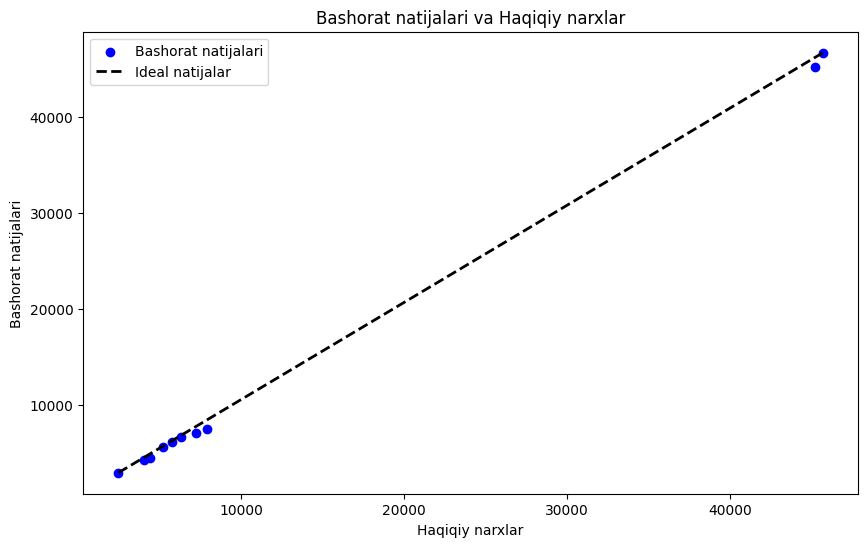

In [184]:
# Bashorat natijalarni grafikda chizish
plt.figure(figsize=(10, 6))
plt.scatter(test_label, predicted_data, color='blue', label='Bashorat natijalari')
plt.plot([min(test_label), max(test_label)], [min(predicted_data), max(predicted_data)], 'k--', lw=2, label='Ideal natijalar')
plt.xlabel('Haqiqiy narxlar')
plt.ylabel('Bashorat natijalari')
plt.title('Bashorat natijalari va Haqiqiy narxlar')
plt.legend()
plt.show()

In [176]:
test_data_prepared = full_pipeline.transform(test_data)
y_predicted = RF_model.predict(test_data_prepared)
pd.DataFrame({'Test data jadvalidagi chiptalar narxini taxminiy baxosi':y_predicted})

,Test data jadvalidagi chiptalar narxini taxminiy baxosi
0,53405.04
1,56106.52
2,23337.18
3,2619.80
4,5798.90
...,...
4995,59106.14
4996,4571.46
4997,50274.56
4998,48694.50


### Funksiya yordamida validation ma'lumotlarini ko'rsatamiz

In [178]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [179]:
scores = cross_val_score(LR_Model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [6753.83385444 6729.41242916 6676.00757311 6361.75662097 6727.57519518
 6736.04629409 6923.49287861 6539.54368144 6716.57906969 6994.14812375]
Mean: 6715.839572045622
Std.dev: 167.56833900552056


# Decision Tree modeli

In [180]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [4702.01978816 4723.17073418 5244.52264075 4717.49778831 4838.48178792
 4888.76733664 5192.5242536  5168.34660442 4844.37029049 5300.55482437]
Mean: 4962.025604883808
Std.dev: 225.61598752630763


# Random Forest modeli

In [181]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [3570.22987088 3881.1315786  4001.3247279  3462.89226542 3606.00832682
 3723.34423228 4029.78051288 3766.03346166 3732.32354095 3826.34363161]
Mean: 3759.9412149006384
Std.dev: 173.27395340083427


# Modelni Saqlash

### LinearRegression model

In [188]:
filename = 'LR_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(LR_Model, file)

### Decision model

In [189]:
filename = 'Tree_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(Tree_model, file)

### Random forest model

In [187]:
filename = 'RF_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

### Modelni qayta o'qish (test uchun)

In [192]:
filename = 'Tree_model.pkl'
with open(filename, 'rb') as file:
    model = pickle.load(file)

### Modelni sinab ko'rish

In [193]:
scores = cross_val_score(model, X_prepared, y, scoring="neg_mean_squared_error", cv=5)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [4962.65428814 5091.07974547 4799.05877537 5133.58290277 5026.56466741]
Mean: 5002.588075833432
Std.dev: 117.11889751085074
